In [2]:
import numpy as np
import nibabel as nib
import os
import matplotlib.pyplot as plt
import glob
import gzip
import shutil
from sklearn.preprocessing import MinMaxScaler, RobustScaler

In [63]:
def extract_gz_file(gz_file, output_file):
    if not os.path.exists(output_file):
        with gzip.open(gz_file, 'rb') as f_in:
            with open(output_file, 'wb') as f_out:
                shutil.copyfileobj(f_in, f_out)

def scale_and_save_image(input_file, output_dir, scaler):
    try:
        #print(input_file)
        img = nib.load(input_file)
        data = img.get_fdata()
        #print("Original data shape:", data.shape, "Type:", data.dtype)
       # print("Original data statistics - Mean:", np.mean(data), "Std:", np.std(data))

        scaled_data = scaler.fit_transform(data.reshape(-1, 1)).reshape(data.shape)
        #print("Scaled data statistics - Mean:", np.mean(scaled_data), "Std:", np.std(scaled_data))

        scaled_img = nib.Nifti1Image(scaled_data, affine=img.affine)
        scaled_file_name = os.path.join(output_dir, os.path.basename(input_file).replace('.nii', '_whole_image_scaled.nii.gz'))
        nib.save(scaled_img, scaled_file_name)
    except (OSError, EOFError) as e:
        print(f"Error processing file {input_file}: {e}")

In [65]:
root_dir = '/Users/yehudadicker/Library/Mobile Documents/com~apple~CloudDocs/Penn_Research'  
#institutions = ['Penn', 'CWRU', 'NYU', 'TJU', 'OSU', 'RH']
institutions = ['Penn']

for inst in institutions:

    # Baseline dir in each institution 
    baseline_dir = os.path.join(root_dir, inst, 'Baseline')

    # Dir we're creating for scaling in root dir
    min_max_scaled_baseline_dir = os.path.join(root_dir, 'Min_Max_Scaled')

    # Institution dirs we're creating within Min_Max_Scaled_Baseline
    min_max_inst_dir = os.path.join(root_dir, min_max_scaled_baseline_dir, inst)
   
    # Ensure scaled directories exist
    os.makedirs(min_max_scaled_baseline_dir, exist_ok=True)
    os.makedirs(min_max_inst_dir, exist_ok=True)

    # Process baseline images with MinMaxScaler
    baseline_files = glob.glob(f"{baseline_dir}/*.nii.gz")
    for file in baseline_files:
        extracted_file = file[:-3]
        extract_gz_file(file, extracted_file)
        scale_and_save_image(extracted_file, min_max_inst_dir, MinMaxScaler())

Error processing file /Users/yehudadicker/Library/Mobile Documents/com~apple~CloudDocs/Penn_Research/Penn/Baseline/ABGN_2015.02.27_flair_LPS_rSRI_SSFinal_N3_sus.nii: Expected 35712000 bytes, got 19463840 bytes from /Users/yehudadicker/Library/Mobile Documents/com~apple~CloudDocs/Penn_Research/Penn/Baseline/ABGN_2015.02.27_flair_LPS_rSRI_SSFinal_N3_sus.nii
 - could the file be damaged?


In [3]:
#unscaled_image = '/Users/yehudadicker/Library/Mobile Documents/com~apple~CloudDocs/Penn_Research/Penn/Baseline/AAAB_2006.10.28_adc_LPS_rSRI_SSFinal.nii'
unscaled_image = '/Users/yehudadicker/Library/Mobile Documents/com~apple~CloudDocs/Penn_Research/Penn/Baseline/AAQZ_2013.10.25_adc_LPS_rSRI_SSFinal.nii'

unscaled_img= nib.load(unscaled_image)
unscaled_data = unscaled_img.get_fdata()

unique = np.unique(unscaled_data)
unique

array([0.00000000e+00, 1.81895246e-08, 5.39711095e-07, ...,
       1.11786956e-02, 1.13028623e-02, 1.13395546e-02])

In [7]:
#scaled_image = '/Users/yehudadicker/Library/Mobile Documents/com~apple~CloudDocs/Penn_Research/Min_Max_Scaled/Penn/AAAB_2006.10.28_adc_LPS_rSRI_SSFinal_whole_image_scaled.nii'
scaled_image = '/Users/yehudadicker/Library/Mobile Documents/com~apple~CloudDocs/Penn_Research/Scaled/Min_Max_Scaled/By_Image/Penn/AAQZ_2013.10.25_adc_LPS_rSRI_SSFinal_whole_image_scaled.nii'

scaled_img= nib.load(scaled_image)
scaled_data = scaled_img.get_fdata()

unique = np.unique(scaled_data)
unique

array([0.00000000e+00, 1.60407752e-06, 4.75954406e-05, ...,
       9.85814349e-01, 9.96764225e-01, 1.00000000e+00])

In [8]:
print("Original data statistics - Mean:", np.mean(unscaled_data), "Std:", np.std(unscaled_data))
print("Scaled data statistics - Mean:", np.mean(scaled_data), "Std:", np.std(scaled_data))

Original data statistics - Mean: 0.0005641350278775397 Std: 0.001431940029537309
Scaled data statistics - Mean: 0.04974931111580613 Std: 0.12627833144247114


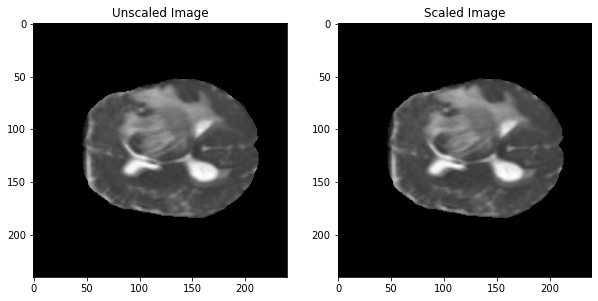

In [47]:
import matplotlib.pyplot as plt

# Assuming the images are 3D, we take a slice from the middle for display
slice_idx = unscaled_data.shape[2] // 2

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(unscaled_data[:, :, slice_idx], cmap='gray')
plt.title('Unscaled Image')
plt.subplot(1, 2, 2)
plt.imshow(scaled_data[:, :, slice_idx], cmap='gray')
plt.title('Scaled Image')
plt.show()

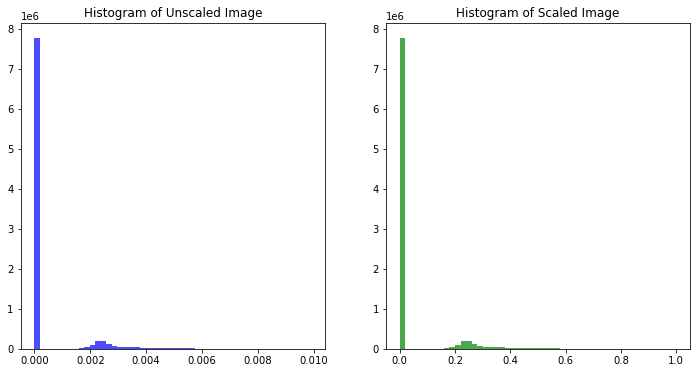

Unscaled Image - Mean: 0.00039747165601163476 Std: 0.0011139564081072085
Scaled Image - Mean: 0.04012037570676458 Std: 0.11244160165451092


In [48]:
import numpy as np

# Histogram comparison
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(unscaled_data.ravel(), bins=50, color='blue', alpha=0.7)
plt.title('Histogram of Unscaled Image')
plt.subplot(1, 2, 2)
plt.hist(scaled_data.ravel(), bins=50, color='green', alpha=0.7)
plt.title('Histogram of Scaled Image')
plt.show()

# Basic statistics
print("Unscaled Image - Mean:", np.mean(unscaled_data), "Std:", np.std(unscaled_data))
print("Scaled Image - Mean:", np.mean(scaled_data), "Std:", np.std(scaled_data))


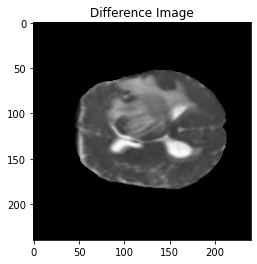

Mean Squared Error: 0.013971753702334557


In [49]:
# Subtracting images
difference = scaled_data - unscaled_data
plt.imshow(difference[:, :, slice_idx], cmap='gray')
plt.title('Difference Image')
plt.show()

# Mean Squared Error
mse = np.mean((scaled_data - unscaled_data) ** 2)
print("Mean Squared Error:", mse)


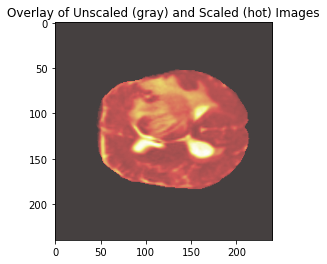

In [50]:
plt.imshow(unscaled_data[:, :, slice_idx], cmap='gray', alpha=0.5)
plt.imshow(scaled_data[:, :, slice_idx], cmap='hot', alpha=0.5)
plt.title('Overlay of Unscaled (gray) and Scaled (hot) Images')
plt.show()


In [68]:
import os
import glob

def count_gz_files(directory):
    gz_files = glob.glob(f"{directory}/*.gz")  # Finds all .gz files in the directory
    return len(gz_files)

# Define your two directories
dir1 = '/Users/yehudadicker/Library/Mobile Documents/com~apple~CloudDocs/Penn_Research/Penn/Baseline'
dir2 = '/Users/yehudadicker/Library/Mobile Documents/com~apple~CloudDocs/Penn_Research/Min_Max_Scaled/Penn'

# Count .gz files in each directory
gz_counts_dir1 = count_gz_files(dir1)
gz_counts_dir2 = count_gz_files(dir2)

print(gz_counts_dir1)
print(gz_counts_dir2)


443
442
